## Bubble Sort
Possible optimisation:
1. A bool value that chooses when to stop: `swapped`
2. Reduce the number of inner_iteration by `n = n-1` by outer iteration
3. Don't have to decrease the ending_element by just once per loop. It can happen that more than one element was placed into their final position in one outer iteration. `n = n_new`

In [27]:
## Bubble sort
arr = [16, 14, 10, 8, 7, 8, 3, 2, 4, 1]

n = len(arr)
swapped = True #When swap=False, the arr is in order

# Outer loop that chooses the final element - n=new_n - to swap
while(swapped):
	swapped = False # Turn false for now, if swap occurs, turn true again
	new_n = 0
	
	# Inner loop that does the swapping
	for inner_index in range(1, n):
		first_number = arr[inner_index-1] # First loop: first element
		second_number = arr[inner_index] # First loop: second element
		
		if(first_number > second_number):
			arr[inner_index-1], arr[inner_index] = arr[inner_index], arr[inner_index-1]
			swapped = True # Swap occurred
			new_n = inner_index # new_n is basically the element that is already sorted
	n = new_n
	
print(arr)

[1, 2, 3, 4, 7, 8, 8, 10, 14, 16]


## Insertion Sort
Given an array `[7, 8, 10, 14, 16, 8, 3, 2, 4, 1]`
The first iteration starts looking at the 2nd element `8`, but since everything in front of it is sorted, it passes.
Second iteration same thing but looks at `10` instead
...
5th iteration looks at '8' and inserts it all the way to the front, WHILE shifting the other elements rightward

Optimisation:
1. Instead of swapping everything, just shift other element, but INSERT the targeted element that the outer_loop is looking at

In [28]:
## Insertion Sort
arr = [16, 14, 10, 8, 7, 8, 3, 2, 4, 1]
n = len(arr)

for outer_index in range(1, n):
    inner_index = outer_index # start with the i-th element
    temp = arr[inner_index] # store the value of the thing to be swapped
    while(inner_index > 0 and temp < arr[inner_index-1]):
        arr[inner_index] = arr[inner_index-1] # instead of doing a swap here, just shift the left element rightwards
        inner_index = inner_index - 1 # move leftwards
    arr[inner_index] = temp # move the temp into the array

print(arr)

[1, 2, 3, 4, 7, 8, 8, 10, 14, 16]


## Binary Heap
Binary heap is a complete binary tree-based data structure that satisfies the heap property.

### Binary Tree
- One root node
- Each node has 2 children: left child and right child
- Node w/o children are called leaves
- **Full binary tree**: Every node except leaves have 2 children
- **Complete binary tree**: Every level, except possibly the last is completely filled. And all nodes are as left as possible.

### Finding chlidren and parents
- Finding left child: `(parent_index*2) + 1`
- Finding right child: `(parent_index*2) + 2`

In [29]:
def max_child(array: list[int|float], index: int, heap_size: int):
    """Returns index of bigger child"""
    left = index*2 + 1
    right = index*2 + 2

    # If there only exist left child, by default, the left child will be the max child
    if right>=heap_size:
        return left
    if array[left]>array[right]:
        return left
    return right

In [30]:
def max_heapify(array: list[int|float], index: int, size: int) -> None:
    """
    1. Assumes that the whole heap except for the current node and the children are sorted
    2. Any unsortedness after swapping is only caused to the swapped children
    """
    current_i = index
    swapped = True

    while(current_i < size and swapped):
        swapped = False
        left = current_i*2 + 1
        right = current_i*2 + 2 

        # Exit if there is no left child. It is a leaf node
        if left>=size:
            break

        max_child_i = max_child(array, current_i, size)

        # Swap child and current element
        if array[max_child_i]>array[current_i]:
            array[max_child_i], array[current_i] = array[current_i], array[max_child_i]
            swapped = True

        current_i = max_child_i

# Test max_heapify
result: list[int|float] = [16, 4, 10, 14, 7, 9, 3, 2, 8, 1]
max_heapify(result, 1, len(result))
print(result)
assert result == [16, 14, 10, 8, 7, 9, 3, 2, 4, 1]

[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]


In [31]:
## Build Max Heap
def build_max_heap(array: list[int|float]) -> None:
    """
    1. Find the last parent element and start heapifying from there
    2. Increase upwards the heapify towards the root
    """
    starting_index = len(array)//2 - 1

    for current_index in range(starting_index, -1, -1):
        max_heapify(array, current_index, len(array))

# Test build_max_heap
array: list[int|float] = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
build_max_heap(array)
print(array)
assert array == [16, 14, 10, 8, 7, 9, 3, 2, 4, 1]


[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]


## Heapsort
There is only 2 steps to heapsort
1. Take the root element and swap with the last element. Then remove the now last element and put it into a sorted list. <br />
`heap = [16, 14, 9, 10, 2, 8, 3, 7, 4, 1]` <br />
`heap = [1, 14, 9, 10, 2, 8, 3, 7, 4 ,|| 16]`
2. Apply max_heapify on the now root element <br />
`heap = [14, 10, 9, 7, 2, 8, 3, 1, 4, || 16]`
3. Rinse and repeat step 1&2

In [32]:
def heapsort(array: list[int|float]) -> None:
    """
    1. Build max heap
    2. Swap root and last element
    3. Max heapify the root element. Exclude the last element from future sorts
    4. Repeat step 2 & 3
    """
    build_max_heap(array)
    n = len(array) - 1

    for last_element in range(n,0,-1):
        array[last_element], array[0] = array[0], array[last_element]
        max_heapify(array, 0, last_element)

## Test 
array: list[int|float] = [16, 14, 10, 8, 7, 9, 3, 2, 4, 1]
heapsort(array)
print(array)
assert array == [1, 2, 3, 4, 7, 8, 9, 10, 14, 16]

[1, 2, 3, 4, 7, 8, 9, 10, 14, 16]


## Computational Time
Big O notation: Upper bound limit

| Sorting Algo    | Random List  | Sorted List  | 
| --------------- | ------------ | ------------ |
| Bubble Sort     | $O(n^2)$     | $O(n)$       |
| Insertion sort  | $O(n^2)$     | $O(n)$       |
| Heap sort       | $O(nlog(n))$ | $O(nlog(n))$ | 



$T(n) = O(n^2)$ <br>
For the above algorithm, plot both the x and y-axis using logarithmic scale. We should see that we get a linear slope of gradient 2. <br>
$y=x^2$ <br>
if we log both sides, we would get <br>
$log(y) = 2log(x)$

$T(n) = O(nlog(n))$
For the above algorithm, plot just the x-axis as $nlog(n)$ to see the linear relationship.

### Analysing Computation Time using Model
Break the algortihm into its steps instead of running experiments.

Note that Big O doesn't care about the constant factors - multiplication is ignored.
- O(n/2) = O(n)
- 2*O(1) = O(1)

### Multiplying between 2 Big O's
- $O(n) * O(log(n)) = O(nlog(n))$

### Understanding Maxheapify
`while((current_i < n) and swapped):` This line runs at `O(log(n))`, think of the number of levels vs the number nodes relationship.

### Big Oh (Upper Bound)
Used to define the upperbound on the growth of a function
$f(x) = O(g(x))$ <br>
if and only if <br>
$lim_{x \rightarrow \infty} sup \frac{f(x)}{g(x)} < \infty$

### Big Omega (Lower Bound)
Used to describe the lowerbound of an algorithm, expresses the best case running time of an algorithm                             

### Big Theta (Average Bound)
Used to describe the average bound of the algorithm. Used when the upper and lower bound can be expressed as the same g(n). <br>
$c_1g(n) \leq f(n) \leq c_2g(n)$

### Little Oh (*STRICT* Upper Bound)
Describes a strict upper bound. If f(n)=o(g(n)) then f(n) grows strictly slower than g(n)

## Recursion
When the problem can be broken down into smaller problems that seemed to be a mini version of itself. Recursion can be used, use the idea of divide and conquer. And the problem is small enough, hopefully it is trivial. Then combine the solution upwards.
- Base case: When to terminate the recursion. Trivial and terminating
- Recursive case: The subproblem should be the **same** but **smaller** problem

In [33]:
def recursive_sum(arr: list) -> int:
    # Base case: If arr is of length 1, return the number itself
    if len(arr) == 1:
        return arr[0]
    # Recursive case: Returns the first element + the recursive_sum of those after it
    else:
        return arr[0] + recursive_sum(arr[1::])
    
print(recursive_sum([3,1,2]))

6


In [34]:
def recursive_factorial(arr: list) -> int:
    # Same as recursive sum
    pass

In [35]:
def recursive_tower(n:int, source, destination, auxilary):
    """
    For 3 disks to go from source to destination, there needs to be a previous step
    - MOVE 2 smaller disks from source into the auxilary (RECURSION)
    - Put the last BIGGEST disk into destination
    - MOVE the 2 smaller disks from auxilary into destination (RECURSION)
    """
    if n==1:
        print(f"Move disk 1 from {source} to {destination}")
        return

    # Move the first n-1 disks from source to auxilary tower
    recursive_tower(n-1, source, auxilary, destination)

    # Move disk from source to destination
    print(f"Move disk {n} from {source} to {destination}")

    # Move first n-1 disks from aux to dest tower
    recursive_tower(n-1, auxilary, destination, source)

n = 3
recursive_tower(n, 'A', 'B', 'C')

Move disk 1 from A to B
Move disk 2 from A to C
Move disk 1 from B to C
Move disk 3 from A to B
Move disk 1 from C to A
Move disk 2 from C to B
Move disk 1 from A to B


In [36]:
def merge_sort(arr: list[int], p:int, r: int):
    if r-p>0:
        q = (p+r)//2 # Calculates the last element of first half
        merge_sort(arr, p, q) # Mergesort on the first half of the array
        merge_sort(arr, q+1, r) # Mergesort on the second half of the array
        merge(arr, p, q, r)

def merge(arr: list[int], p:int, q:int, r:int):
    nleft = q - p + 1 # Plus 1 because, array[p,.., q]
    nright = r - q # No plus 1 because array[q+1, ..., r]

    # Splice the array
    left_array = arr[p:q+1]
    right_array = arr[q+1:r+1]

    left, right, dest = 0, 0, p

    # If both left and righ array have elements in them
    while (left<nleft and right<nright):
        if left_array[left] <= right_array[right]:
            arr[dest] = left_array[left]
            left += 1
        else:
            arr[dest] = right_array[right]
            right += 1
        dest += 1

    # If only left array have elements in them
    while left<nleft:
        arr[dest] = left_array[left]
        left += 1
        dest += 1

    # If only right array have elements in them
    while right<nright:
        arr[dest] = right_array[right]
        right += 1
        dest += 1

arr = [1, 2, 100, 3, 4]
merge_sort(arr, 0, len(arr)-1)

print(arr)

[1, 2, 3, 4, 100]


## Object Orientated Programming
- Attribute: Defines the characteristic
- Method: Defines what the object can do

*Class definition* simply creates a blueprint of what the object is/can do. *Instantiation* is the step that actually creates the object.

The reason why `self` is always the first argument of a method is because `self` refers to the particular object instance of the class.

### Encapsulation
Data should be bundled together with the methods to access it. Data should be hidden from outside the object. If anyone wants to change the state of the object, they would need to do so through a method.

Encapsulation also allows us to change the internal data without changing the interface to access the data. In the above example, we store the position as a tuple. But what if we want to use list or dictionary instead? If we create methods to access these internal data, we can change the internal data without changing the way other objects interact with our data. The key is to keep the interface consistent and stable. We do these by creating methods to access our internal data.

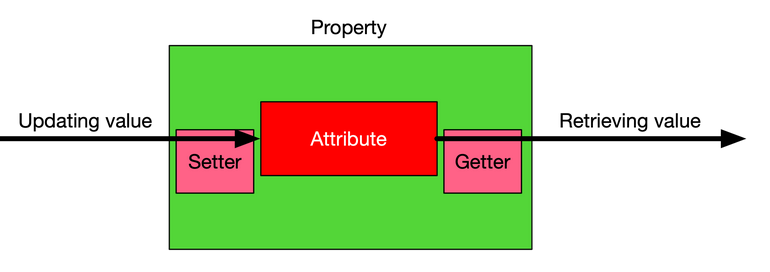

Do note that **property is not the same as an attribute**

Also note in the example below on the RobotTurtle scenario below. Using a getter and setter does not make the variable actually private. The variable can still be accessed directly through `robot._name = "James"` instead of accessing it through the getter such as `robot.name = "James"` which would throw an error

### Abstraction
One of the purpose is abstraction. Anyone working with the object does not need to know how the state or the data inside the object is implemented. 

In [37]:
# Encapsulation 1 - Getter and setter
class RobotTurtle:
    # Attributes:
    def __init__(self, name, speed=1):
        self.name = name
        self.speed = speed
        self._pos = (0, 0)

    # property getter
    @property
    def name(self):
        return self._name

    # property setter
    @name.setter
    def name(self, value):
        if isinstance(value, str) and value != "":
            self._name = value

    # property getter
    @property
    def speed(self):
        return self._speed

    # property setter
    @speed.setter
    def speed(self, value):
        if isinstance(value, int) and value > 0:
            self._speed = value

    # property getter
    @property
    def pos(self):
        return self._pos

    # Methods:
    def move(self, direction):
        update = {'up' : (self.pos[0], self.pos[1] + self.speed),
                  'down' : (self.pos[0], self.pos[1] - self.speed),
                  'left' : (self.pos[0] - self.speed, self.pos[1]),
                  'right' : (self.pos[0] + self.speed, self.pos[1])}
        self._pos = update[direction]


    def tell_name(self):
        print(f"My name is {self.name}")

robot = RobotTurtle("Tom")
robot._pos = "James"
robot.pos

'James'

In [38]:
# Encapsulation2 - Computed property
import math
class Coordinate:

    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    @property
    def distance(self):
        """
        In this example, the distance is a property since it does not require a parenthesis to be called.
        So when to use computed property such as this, when the computation is
        1. Easy
        2. Requires only the object's own attribute and not any outside argument
        """
        return math.sqrt(self.x * self.x + self.y * self.y)

In [39]:
# Encapsulation 3 - Composition
"""
Instead of making the position as a tuple, initiate it as a Coordinate object. Allows us to use attribute names like self.pos.x instead of self.pos[0] which is not as intuitive
"""
def __init__(self, name, speed=1):
    self.name = name
    self.speed = speed
    self._pos = Coordinate(0, 0)

def move(self, direction):
    update = {'up' : Coordinate(self.pos.x, self.pos.y + self.speed),
                'down' : Coordinate(self.pos.x, self.pos.y - self.speed),
                'left' : Coordinate(self.pos.x - self.speed, self.pos.y),
                'right' : Coordinate(self.pos.x + self.speed, self.pos.y)}
    self._pos = update[direction]

### Special Methods
`__init__()` is always called during object instantiation. 

`__str__()` is called when trying to convert the object into a string. Look at example below

In [40]:
p1 = Coordinate(2, 3)
print(p1)

In [41]:
import math

class Coordinate:

    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    @property
    def distance(self):
        return math.sqrt(self.x * self.x + self.y * self.y)

    def __str__(self):
        """
        This overrides the default __str__() method
        """
        return f"({self.x}, {self.y})"
    
p1 = Coordinate(2, 3)
print(p1)

(2, 3)


### Linear Data Structure
**Stack**: Last In First Out (LIFO)
- `push`: Insert an element into the top of the stack
- `pop`: Removes an element from the top of the stack
- `peek`: Reads an element from the top WITHOUT removing it

**Call stack**: The last function to gets called will be the first to end

**Queue**: First in First Out (FIFO)
- `enqueue`: Put an element into the rear of the queue
- `dequeue`: Removes an element from the front of the queue
- `peek`: Look at the element from the front of the queue without removing it

In [42]:
# Post-fix evaluation with stack
"""
Post-Fix Evaluation Steps:
1. Read the expression from left to right.
2. If it is an operand (not an operator symbol), do the following:
    2.1. put the operand into the stack.
3. Otherwise (this is an operator), do the following:
    3.1. pop out the top of the stack as the *right* operand
    3.1. pop out the top of the stack as the *left* operand
    3.1. evaluate the operator with the operands
    3.1. push the result into the stack
"""

def post_fix(eqn: str):
    stack = []

    operators = {
        "*": lambda x,y: x*y,
        "/": lambda x,y: x/y,
        "+": lambda x,y: x+y,
        "-": lambda x,y: x-y
    }

    for i in eqn:
        if i.isdigit():
            stack.append(int(i))
        else:
            operator = operators[i]
            right = stack.pop()
            left = stack.pop()

            result = operator(left, right)
            stack.append(result)
    
    return stack[0]

print(post_fix("42*3+"))

11


In [43]:
# Radix sort with queue - non-comparison sorting algo
from collections import deque
def radix_sort(arr):
    max_num = max(arr)
    max_digits = len(str(max_num))

    # Create 10 buckets (queues) for digits 0-9
    buckets = [deque() for _ in range(10)]

    # Perform sorting for each digit

In [44]:
# Queue implemented with double stack
class queueDoubleStack:
    """
    2 array attribute, one for left, one for right
    When adding, just add to right
    When removing, just remove to left

    When left is empty, bring everything from right to left. And since the bringing of elements from right to left already inverts the order. It will be like a queue where it is FIFO instead of FILO in a stack
    """
    def __init__(self):
        self._left_stack = []
        self._right_stack = []

    def enqueue(self, item):
        self._right_stack.append(item)

    def dequeue(self):
        # If empty left
        if len(self._left_stack) == 0:
            n = len(self._right_stack)
            for _ in range(n):
                self._left_stack.append(self._right_stack.pop())

        return self._left_stack.pop()
    
queue = queueDoubleStack()
queue.enqueue(3)
queue.enqueue(5)
print(queue.dequeue())
queue.enqueue(8)
print(queue.dequeue())
queue.dequeue()
# queue.dequeue()


3
5


8

In [45]:
list(range(2))

[0, 1]